In [2]:
import sys
sys.path.insert(0, '..')

import os 
cwd = os.getcwd()
if 'notebooks' not in cwd :
    os.chdir('./Exo-Evol/notebooks/')

import numpy as np
import pandas as pd
from python_modules.grid_data_processing_module import load_grid
from python_modules.numerical_tools_module import interpolate_negatives_rowwise
from python_modules.instrument_module import read_filter_docs, get_wl_all_filters, photo_columns
from python_modules.physics_module import diluted_planet
from sklearn.ensemble import RandomForestRegressor
from python_modules.regression_module import MLmodels
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from itertools import product
import gc
import glob


R_J = 69911000
M_J = 1.898*1e27
R_s = 696340000
M_s = 1.989*1e30
R_J = 69911000
M_J = 1.898*1e27
R_E = 6371*1e3
M_E = 5.972*1e24
G_u = 6.674*1e-11
Na = 6.022*1e23
Kb = 1.380649*1e-23
R_g = 8.31446261815324
sigma = 5.67*1e-8

In [3]:
ML = MLmodels(n_estimators=1000)

loaded example wavelength


In [4]:
ML.prepare_data()

                                                files planet_type     mass
0   ../data/current_exoevol_grid/ker/dec2024_0.162...     dec2024   0.1624
1   ../data/current_exoevol_grid/ker/dec2024_1.214...     dec2024   1.2140
2   ../data/current_exoevol_grid/ker/dec2024_0.703...     dec2024   0.7037
3   ../data/current_exoevol_grid/ker/dec2024_0.336...     dec2024   0.3360
4   ../data/current_exoevol_grid/ker/dec2024_0.164...     dec2024   0.1644
5   ../data/current_exoevol_grid/ker/dec2024_1.810...     dec2024   1.8109
6   ../data/current_exoevol_grid/ker/dec2024_0.132...     dec2024   0.1321
7   ../data/current_exoevol_grid/ker/dec2024_0.230...     dec2024   0.2308
8   ../data/current_exoevol_grid/ker/dec2024_0.233...     dec2024   0.2336
9   ../data/current_exoevol_grid/ker/dec2024_2.145...     dec2024   2.1457
10  ../data/current_exoevol_grid/ker/dec2024_0.174...     dec2024   0.1746
11  ../data/current_exoevol_grid/ker/dec2024_2.835...     dec2024   2.8355
12   ../data/current_exoe

  0%|          | 0/41 [00:00<?, ?it/s]

  2%|▏         | 1/41 [00:00<00:14,  2.81it/s]

Memory usage: 660.08 MB


  5%|▍         | 2/41 [00:00<00:14,  2.78it/s]

Memory usage: 1055.05 MB


  7%|▋         | 3/41 [00:01<00:13,  2.87it/s]

Memory usage: 1469.77 MB


 10%|▉         | 4/41 [00:01<00:10,  3.43it/s]

Memory usage: 1694.84 MB


 17%|█▋        | 7/41 [00:01<00:06,  5.21it/s]

Memory usage: 2111.79 MB
Memory usage: 2261.57 MB


 20%|█▉        | 8/41 [00:02<00:07,  4.38it/s]

Memory usage: 2676.33 MB


 22%|██▏       | 9/41 [00:02<00:08,  3.86it/s]

Memory usage: 3093.43 MB


 24%|██▍       | 10/41 [00:02<00:08,  3.64it/s]

Memory usage: 3470.94 MB


 27%|██▋       | 11/41 [00:03<00:08,  3.45it/s]

Memory usage: 3887.10 MB


 32%|███▏      | 13/41 [00:03<00:07,  3.80it/s]

Memory usage: 4347.48 MB
Memory usage: 4495.39 MB


 34%|███▍      | 14/41 [00:03<00:08,  3.28it/s]

Memory usage: 4964.59 MB


 37%|███▋      | 15/41 [00:04<00:08,  3.17it/s]

Memory usage: 5376.95 MB
Memory usage: 5382.53 MB


 44%|████▍     | 18/41 [00:04<00:04,  4.87it/s]

Memory usage: 5645.66 MB
Memory usage: 5792.10 MB


 46%|████▋     | 19/41 [00:05<00:05,  4.40it/s]

Memory usage: 6152.00 MB
Memory usage: 6192.07 MB


 54%|█████▎    | 22/41 [00:05<00:03,  5.97it/s]

Memory usage: 6520.91 MB


 56%|█████▌    | 23/41 [00:05<00:03,  5.28it/s]

Memory usage: 6850.87 MB


 59%|█████▊    | 24/41 [00:05<00:03,  4.98it/s]

Memory usage: 7111.79 MB


 63%|██████▎   | 26/41 [00:06<00:03,  4.90it/s]

Memory usage: 7529.70 MB
Memory usage: 7643.96 MB


 66%|██████▌   | 27/41 [00:06<00:03,  4.44it/s]

Memory usage: 7976.47 MB
Memory usage: 7981.59 MB


 71%|███████   | 29/41 [00:06<00:02,  5.66it/s]

Memory usage: 8213.27 MB
Memory usage: 8216.36 MB
Memory usage: 8217.64 MB


 78%|███████▊  | 32/41 [00:07<00:01,  6.53it/s]

Memory usage: 8650.78 MB


 80%|████████  | 33/41 [00:07<00:01,  5.16it/s]

Memory usage: 9102.85 MB
Memory usage: 9107.28 MB


 85%|████████▌ | 35/41 [00:07<00:01,  5.60it/s]

Memory usage: 9447.07 MB


 88%|████████▊ | 36/41 [00:08<00:01,  4.77it/s]

Memory usage: 9839.80 MB
Memory usage: 9841.66 MB


 93%|█████████▎| 38/41 [00:08<00:00,  5.80it/s]

Memory usage: 10064.83 MB


 95%|█████████▌| 39/41 [00:08<00:00,  5.17it/s]

Memory usage: 10392.09 MB


100%|██████████| 41/41 [00:09<00:00,  4.54it/s]

Memory usage: 10772.63 MB
Memory usage: 10775.29 MB
Memory usage: 10775.29 MB
Dataset loaded


saved example wavelength
Data prepared with 8450 samples


P_profile  \
10     [1.1595399451074379e-05, 1.5590395868560898e-0...   
16     [1.1595399451074379e-05, 1.5590395868560898e-0...   
20     [1.1595399451074379e-05, 1.5590395868560898e-0...   
22     [1.1595399451074379e-05, 1.5590395868560898e-0...   
23     [1.1595399451074379e-05, 1.5590395868560898e-0...   
...                                                  ...   
15962  [1.1595399451074379e-05, 1.5590395868560898e-0...   
15963  [1.1595399451074379e-05, 1.5590395868560898e-0...   
15964  [1.1595399451074379e-05, 1.5590395868560898e-0...   
15965  [1.1595399451074379e-05, 1.5590395868560898e-0...   
15967  [1.1595399451074379e-05, 1.5590395868560898e-0...   

                                               T_profile  \
10     [166.3385057307187, 166.89195993871897, 167.63...   
16     [261.66446082650987, 250.11065081103695, 238.2...   
20     [261.6544859284603, 250.09878471072145, 238.21...   
22     [261.1566841173942, 248.63131954200924, 236.69...   
23     [264.71069821169976, 251.96312335769568, 239.8...   
...                                                  ...   
15962  [313.6575522396146, 294.87747551402555, 278.74...   
15963  [306.7483875724989, 310.73100689937803, 316.05...   
15964  [372.12491036963115, 376.67162594086165, 382.7...   
15965  [465.43076509032926, 463.1350021299176, 462.04...   
15967  [361.0716438368508, 341.5019968377975, 323.279...   

                                             rho_profile  \
10     [1.933580153702719e-06, 2.591140659551463e-06,...   
16     [1.229094071986804e-06, 1.728896946402264e-06,...   
20     [1.229140926190148e-06, 1.7289789724912874e-06...   
22     [1.2314838436352916e-06, 1.7391837060969435e-0...   
23     [1.2149432662562904e-06, 1.7161764462527115e-0...   
...                                                  ...   
15962  [1.0453936850714382e-06, 1.4950835048907282e-0...   
15963  [1.107081840273506e-06, 1.4694298293436444e-06...   
15964  [8.860459099148199e-07, 1.1769377421006938e-06...   
15965  [7.084460847473785e-07, 9.572508605438692e-07,...   
15967  [8.915127092626863e-07, 1.2673573944588432e-06...   

                                               R_profile  \
10     [51931475.052302994, 51909591.7342802, 5188762...   
16     [38499218.0700928, 38481290.54696686, 38464230...   
20     [38331087.13856733, 38313287.74536131, 3829634...   
22     [71375131.94375587, 71313619.85573547, 7125515...   
23     [37147246.408398695, 37130312.68868266, 371142...   
...                                                  ...   
15962  [67180677.52326834, 67178995.73744264, 6717740...   
15963  [70850561.8515794, 70848650.12141286, 70846705...   
15964  [93764987.7623857, 93760807.84617683, 93756560...   
15965  [97088569.06410006, 97083016.08844987, 9707747...   
15967  [70788124.7617846, 70782567.49522375, 70777307...   

                                              wavenumber  \
10     [100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220...   
16     [100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220...   
20     [100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220...   
22     [100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220...   
23     [100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220...   
...                                                  ...   
15962  [100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220...   
15963  [100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220...   
15964  [100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220...   
15965  [100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220...   
15967  [100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220...   

                                              wavelength  \
10     [19.23076923076923, 18.51851851851852, 17.8571...   
16     [19.23076923076923, 18.51851851851852, 17.8571...   
20     [19.23076923076923, 18.51851851851852, 17.8571...   
22     [19.23076923076923, 18.51851851851852, 17.8571...   
23     [19.23076923076923, 18.51851851851852, 17.8571...   
...                                                  ...   
15962  [19.23076923076

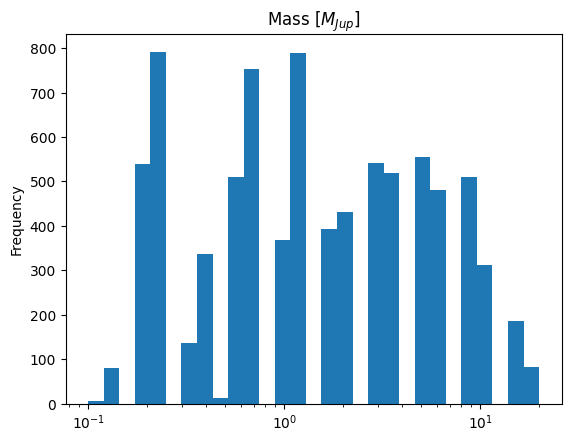

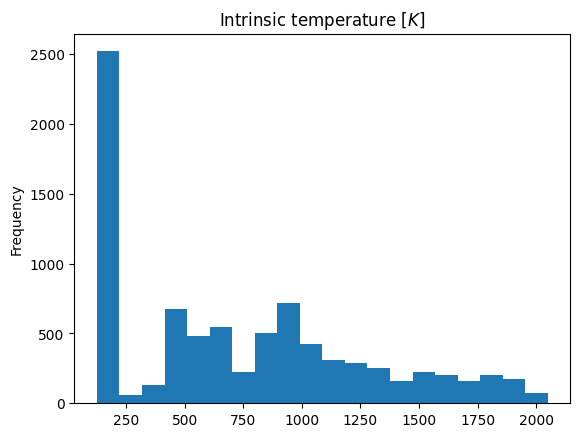

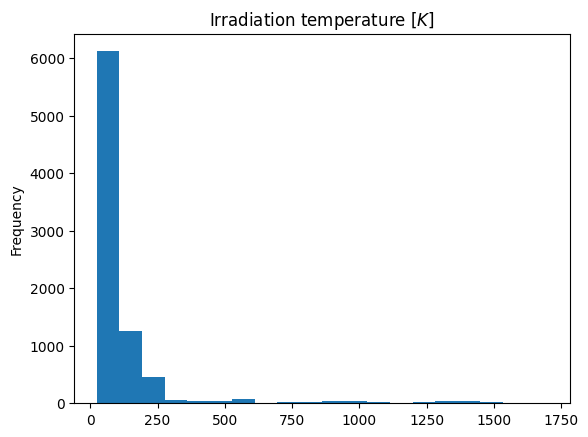

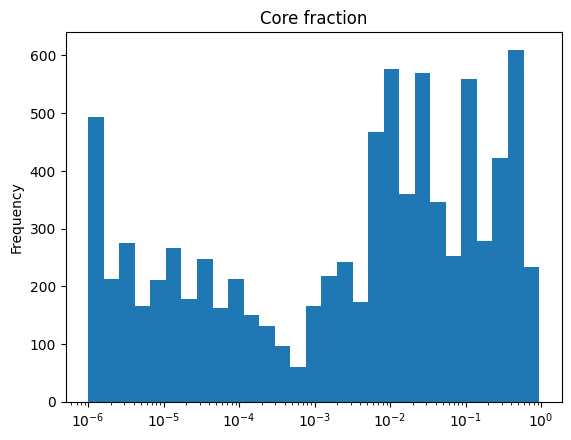

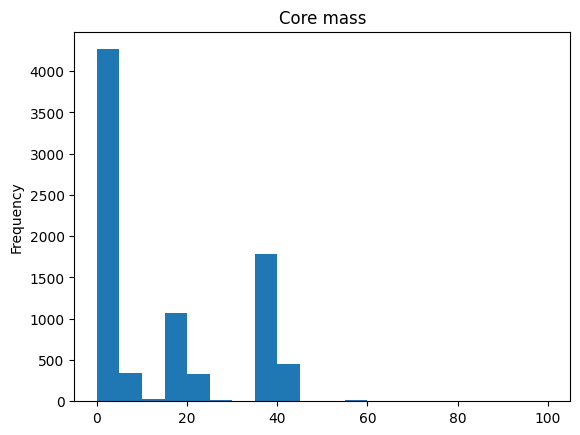

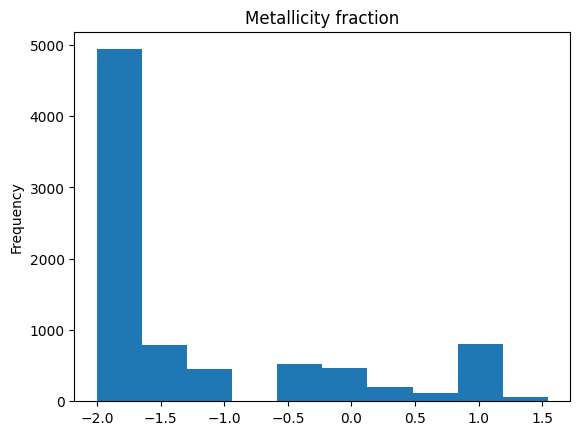

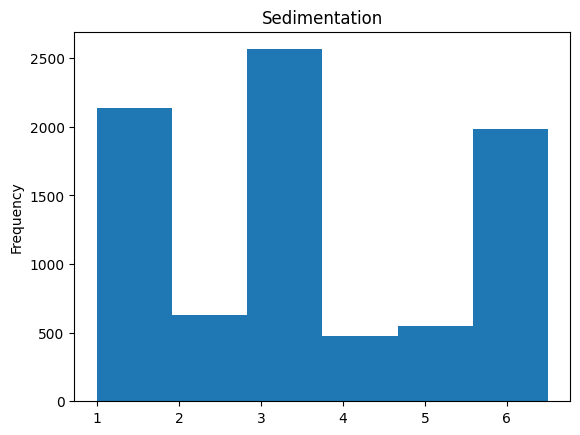

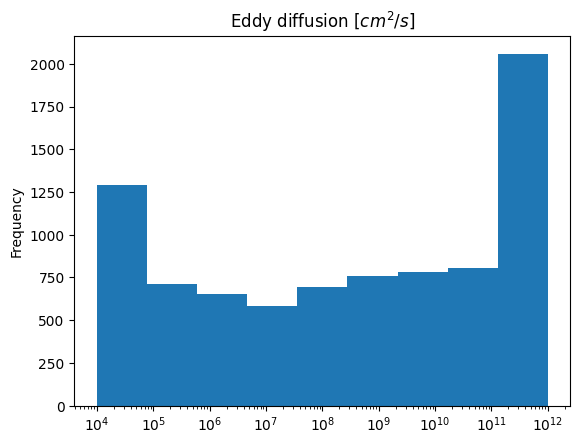

In [4]:
df = ML.grid

plt.figure()
logbins = np.logspace(np.log10(df['Mass_Jup'].min()),np.log10(df['Mass_Jup'].max()),30)
df['Mass_Jup'].plot(kind='hist', bins=logbins)
plt.title(r'Mass $[M_{Jup}]$')
plt.xscale('log')
plt.show()

plt.figure()
df['T_int'].plot(kind='hist', bins=20)
plt.title(r'Intrinsic temperature $[K]$')
plt.show()

plt.figure()
df['T_irr'].plot(kind='hist', bins=20)
plt.title(r'Irradiation temperature $[K]$')
plt.show()

plt.figure()
logbins = np.logspace(np.log10(df['core'].min()),np.log10(df['core'].max()),30)
df['core'].plot(kind='hist', bins=logbins)
plt.title(r'Core fraction')
plt.xscale('log')
plt.show()

plt.figure()
(df['core_Earth']).plot(kind='hist', bins=20)
plt.title(r'Core mass')
plt.show()

plt.figure()
df['Met'].plot(kind='hist', bins=10)
plt.title(r'Metallicity fraction')
plt.show()

plt.figure()
df['f_sed'].plot(kind='hist', bins=6)
plt.title(r'Sedimentation')
plt.show()

plt.figure()
logbins = np.logspace(np.log10(df['kzz'].min()),np.log10(df['kzz'].max()),10)
df['kzz'].plot(kind='hist', bins=logbins)
plt.title(r'Eddy diffusion $[cm^2/s]$')
plt.xscale('log')
plt.show()


Loading ../data/interpolators/nonlinear//Radius_Jup.pkl
Loaded ../data/interpolators/nonlinear//Radius_Jup.pkl


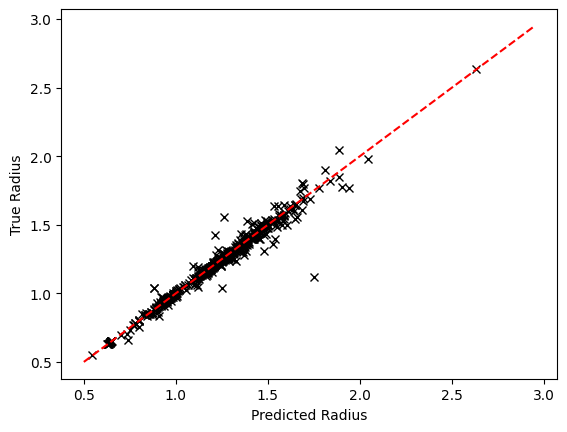

In [ ]:
target = 'Radius_Jup'
model_radius = ML.load_model(target)
plt.plot(ML.use_model(model_radius,ML.X_test),10**ML.y_test[target], 'x', color ='k')
plt.plot(np.arange(0.5,3,0.05),np.arange(0.5,3,0.05), '--', color ='r')
plt.xlabel('Predicted Radius')
plt.ylabel('True Radius')
plt.savefig('../figures/radius_prediction.pdf')
plt.show()


Loading ../data/interpolators/nonlinear//S.pkl
Loaded ../data/interpolators/nonlinear//S.pkl
RandomForestRegressor(n_estimators=1000, n_jobs=24, random_state=42)
1.6352971453154568


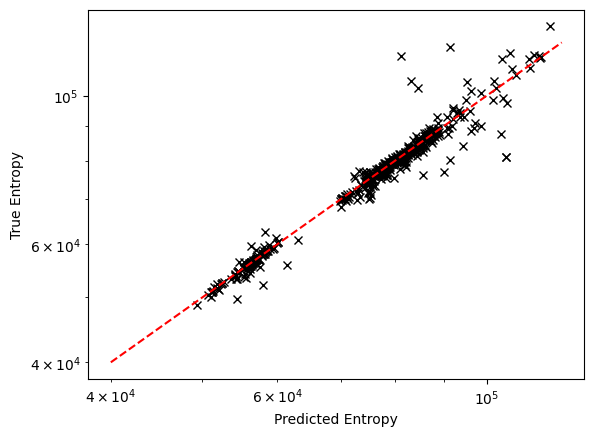

Loading ../data/interpolators/nonlinear//ds_dt.pkl
Loaded ../data/interpolators/nonlinear//ds_dt.pkl
RandomForestRegressor(n_estimators=1000, n_jobs=24, random_state=42)
5.181991352453765


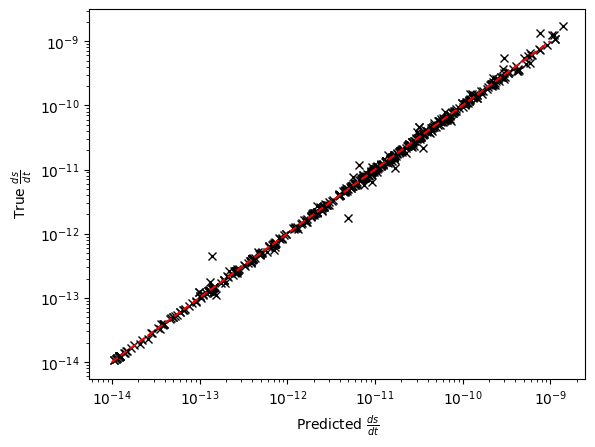

In [5]:
plt.figure()
target = 'S'
model_radius = ML.load_model(target)
print(model_radius)
print(100*np.mean(np.abs(ML.use_model(model_radius,ML.X_test)-10**ML.y_test[target])/10**ML.y_test[target]))
plt.plot(ML.use_model(model_radius,ML.X_test),10**ML.y_test[target], 'x', color ='k')
plt.plot(np.arange(40000,120000,0.05),np.arange(40000,120000,0.05), '--', color ='r')
plt.xlabel('Predicted Entropy')
plt.ylabel('True Entropy')
plt.yscale('log')
plt.xscale('log')
plt.savefig('../figures/entropy_prediction.pdf')
plt.show()

plt.figure()
target = 'ds_dt'
model_radius = ML.load_model(target)
print(model_radius)
print(100*np.mean(np.abs(ML.use_model(model_radius,ML.X_test)-10**ML.y_test[target])/10**ML.y_test[target]))
plt.plot(ML.use_model(model_radius,ML.X_test),10**ML.y_test[target], 'x', color ='k')
plt.plot(np.logspace(-14,-9,100),np.logspace(-14,-9,100), '--', color ='r')
plt.xlabel(r'Predicted $\frac{ds}{dt}$')
plt.ylabel(r'True $\frac{ds}{dt}$')
plt.yscale('log')
plt.xscale('log')
plt.savefig('../figures/entropy_evolution_prediction.pdf')
plt.show()



In [4]:
target = 'flux_radius_age_lgb'
model_flux = ML.load_model(target)
y_test = pd.read_pickle('../data/interpolators/nonlinear/y_test.pkl')
X_test = pd.read_pickle('../data/interpolators/nonlinear/X_test.pkl')[['Mass_Jup',	'T_irr','Met','core_Earth','T_int','f_sed','kzz','S0']]


Loading ../data/interpolators/nonlinear//flux_radius_age_lgb.pkl
Loaded ../data/interpolators/nonlinear//flux_radius_age_lgb.pkl


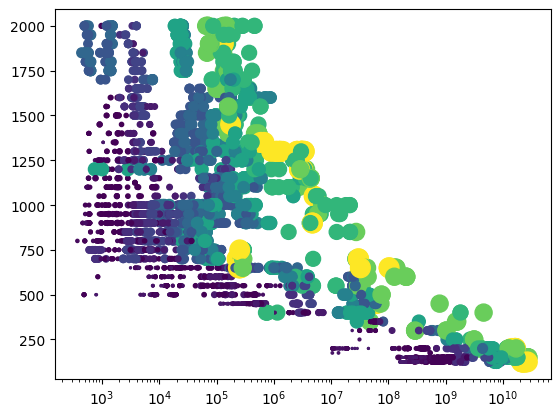

In [10]:
plt.figure()
plt.scatter(ML.use_model(model_flux,X_test)[:,-1],X_test['T_int'],c=X_test['S0'],s=10*X_test['Mass_Jup'])
plt.xscale('log')

In [ ]:
X_test

Mass_Jup  T_irr       Met  core_Earth  T_int  f_sed           kzz  \
589   15.099052    100 -2.000000    0.038390    150   1.00  1.291550e+11   
6914   1.228820     25 -2.000000   20.000293    950   5.50  2.782559e+08   
1081  11.426238     75  1.000000   40.000386   1200   3.00  1.668101e+10   
3199   0.929926    150 -2.000000    5.000045    150   6.00  1.000000e+04   
3786   0.402998    150 -2.000000   39.999187    150   6.00  7.742637e+04   
...         ...    ...       ...         ...    ...    ...           ...   
4766   8.646470     75 -2.000000    5.001343    900   3.75  1.000000e+12   
1497   0.703688    100 -2.000000   39.998670    200   3.00  1.668101e+10   
5099   4.951475     50 -1.154902   39.999300   1850   3.00  4.641589e+06   
3960   0.402998    100 -2.000000    0.312258    200   3.00  1.000000e+04   
5059   4.951475     50  1.000000   39.999300   1550   1.00  1.291550e+11   

             S0  
589   12.000020  
6914   9.671310  
1081  11.650874  
3199   9.652817  
3786   9.777048  
...         ...  
4766  11.412427  
1497   9.664283  
5099  10.649077  
3960   9.777048  
5059  10.649077  

[5310 rows x 8 columns]

In [38]:
grid = list(product(np.linspace(X_test['Mass_Jup'].min(),X_test['Mass_Jup'].max(),10),
        [50],
        [0],
        [20],
        np.linspace(X_test['T_int'].min(),X_test['T_int'].max(),10),
        [3],
        [X_test['kzz'].median()],
        np.linspace(X_test['S0'].min(),X_test['S0'].max(),10)))
out = ML.use_model(model_flux,grid)

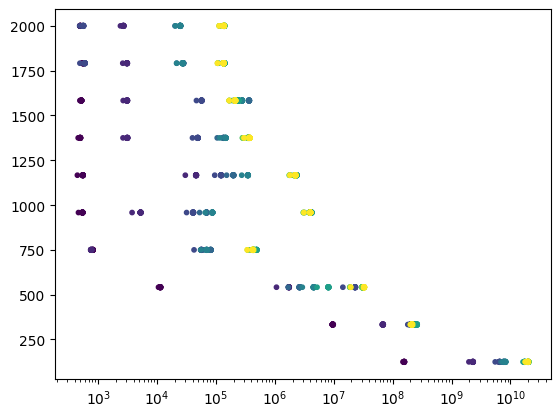

In [39]:
plt.scatter(out[:,-1],np.array(grid)[:,4],c=np.array(grid)[:,0],s=np.array(grid)[:,-1])
plt.xscale('log')

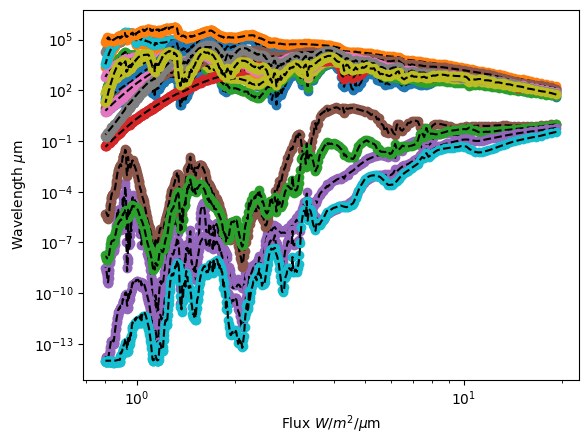

In [37]:
WL_photo = get_wl_all_filters(read_filter_docs(filter_loc='./../../data/filters/filter_doc.csv'))
for ii in range(20) :
    plt.plot(ML.wavelength, ML.use_model(model_flux,X_test)[ii,:len(ML.wavelength)], 'o')
    plt.plot(ML.wavelength, 10**y_test['flux_photo'].iloc[ii][:len(ML.wavelength)], '--', color ='k')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'Wavelength $\mu$m')
plt.xlabel(r'Flux $W/m^2/\mu$m')
plt.savefig('../figures/flux_prediction.pdf')
plt.show()

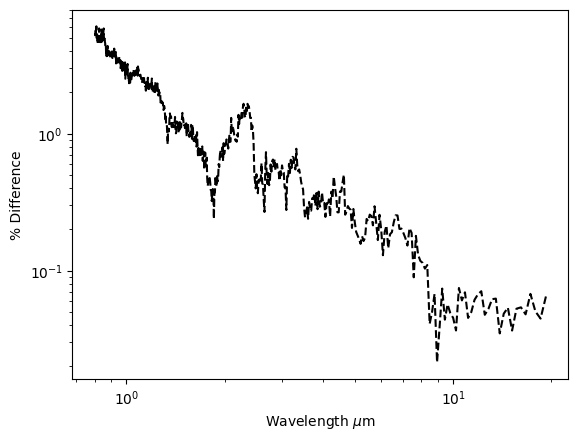

In [7]:
predictions = ML.use_model(model_flux,X_test)
pred_flux = predictions[:,:len(ML.wavelength)]
true_flux = np.array((10**y_test['flux_photo'].iloc[:]).to_list())[:,:len(ML.wavelength)]
plt.plot(ML.wavelength, (100*(pred_flux-true_flux)/true_flux).mean(axis=0), '--', color ='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Wavelength $\mu$m')
plt.ylabel(r'% Difference')
plt.savefig('../figures/flux_prediction_error.pdf')
plt.show()

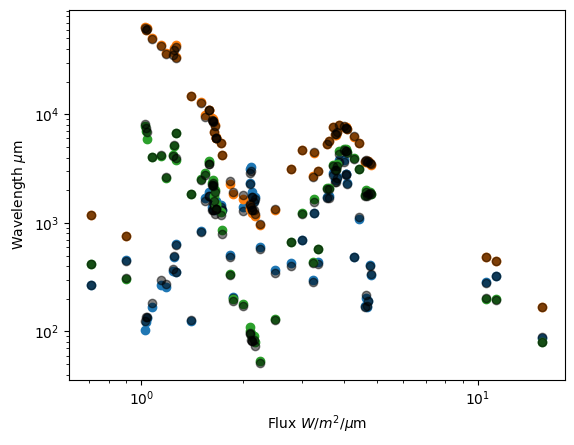

In [8]:
WL_photo = np.array(get_wl_all_filters(read_filter_docs(filter_loc='./../../data/filters/filter_doc.csv')))
for ii in range(3) :
    plt.plot(WL_photo,  ML.use_model(model_flux,X_test)[ii,len(ML.wavelength):-2], 'o')
    plt.plot(WL_photo, 10**y_test['flux_photo'].iloc[ii][len(ML.wavelength):], 'o', color ='k',alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'Wavelength $\mu$m')
plt.xlabel(r'Flux $W/m^2/\mu$m')
plt.savefig('../figures/photometric_prediction.pdf')

0.48989614698818695


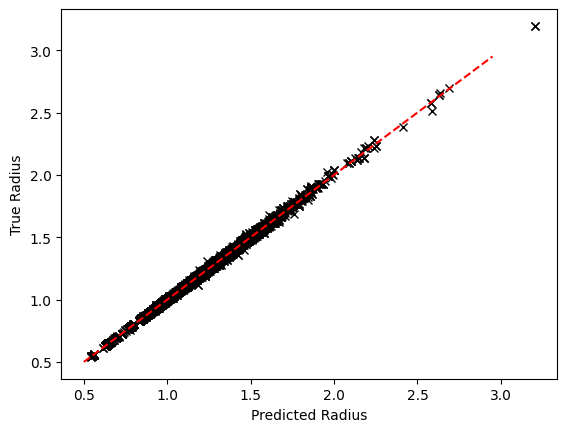

In [9]:
plt.plot(ML.use_model(model_flux,X_test)[:,-2],10**y_test['Radius_Jup'], 'x', color ='k')
plt.plot(np.arange(0.5,3,0.05),np.arange(0.5,3,0.05), '--', color ='r')
print(100*np.mean(np.abs(ML.use_model(model_flux,X_test)[:,-2]-10**y_test['Radius_Jup'])/10**y_test['Radius_Jup']))
plt.xlabel('Predicted Radius')
plt.ylabel('True Radius')
plt.savefig('../figures/cm_radius_prediction.pdf')
plt.show()

0.8526195714960936


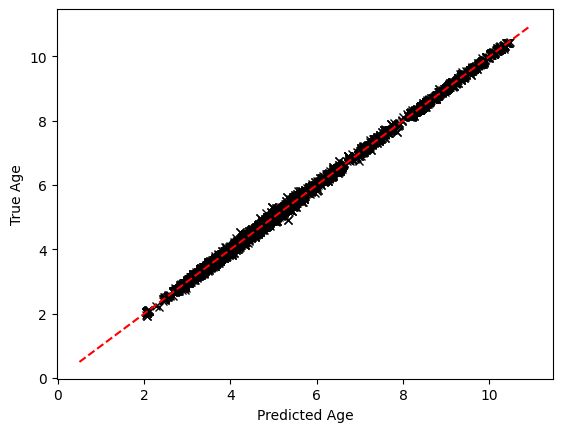

In [10]:
plt.plot(np.log10(ML.use_model(model_flux,X_test)[:,-1]),np.array(y_test['flux_radius_age'].to_list())[:,-1], 'x', color ='k')
plt.plot(np.arange(0.5,11,0.05),np.arange(0.5,11,0.05), '--', color ='r')
print(100*np.mean(np.abs(np.log10(ML.use_model(model_flux,X_test)[:,-1])-np.array(y_test['flux_radius_age'].to_list())[:,-1])/np.array(y_test['flux_radius_age'].to_list())[:,-1]))
plt.xlabel('Predicted Age')
plt.ylabel('True Age')
plt.savefig('../figures/cm_age_prediction.pdf')
plt.show()

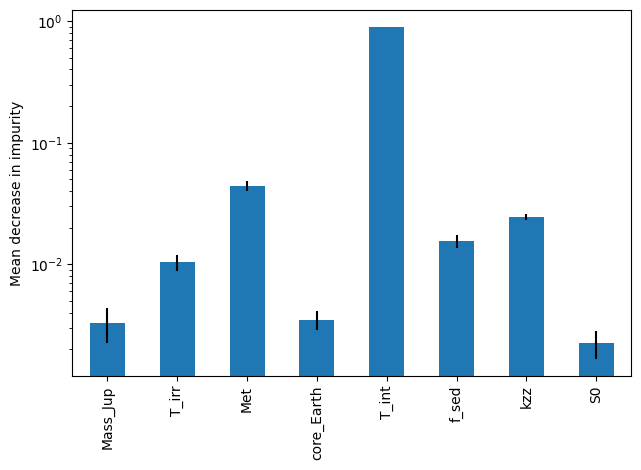

In [43]:
importances = model_flux.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_flux.estimators_], axis=0)
forest_importances = pd.Series(importances, index=list(X_test.columns))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.yscale('log')
plt.savefig('../figures/feature_importance.pdf')

In [5]:
target = 'depth_radius'
model_depth = ML.load_model(target)

Loading ../data/interpolators/nonlinear//depth_radius.pkl
Loaded ../data/interpolators/nonlinear//depth_radius.pkl


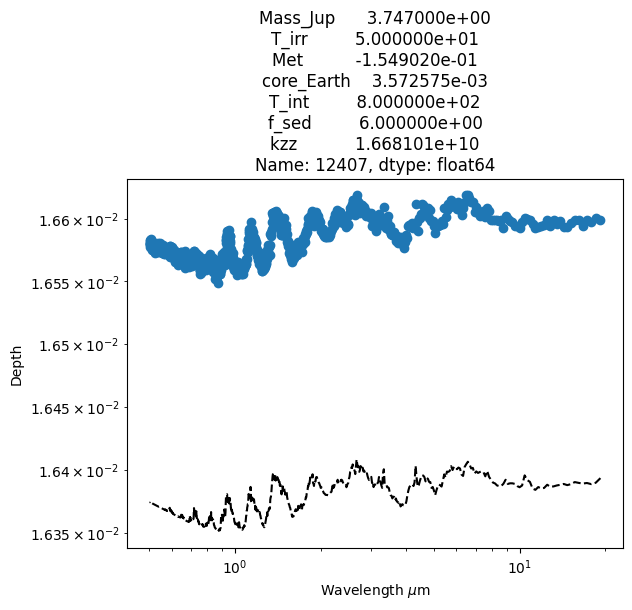

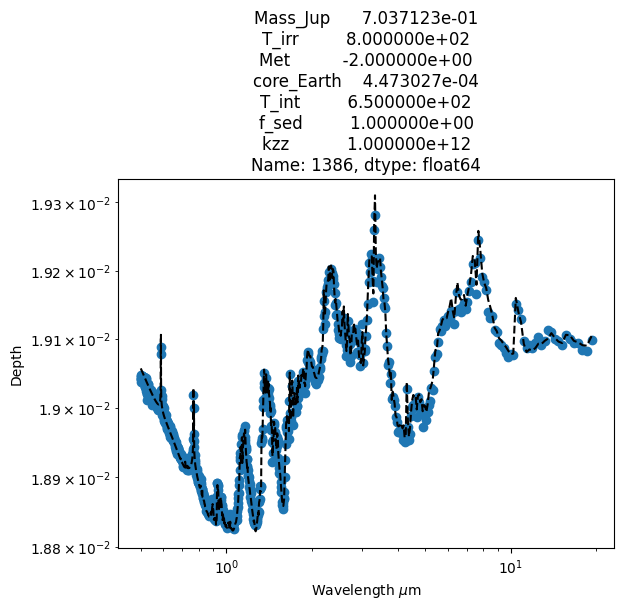

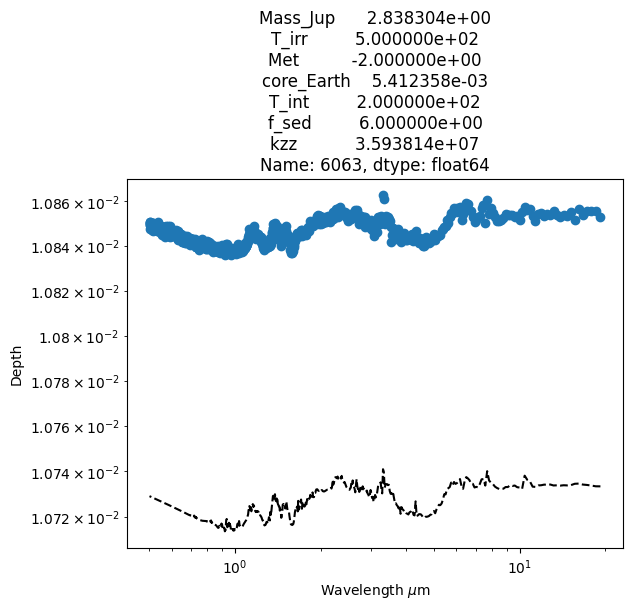

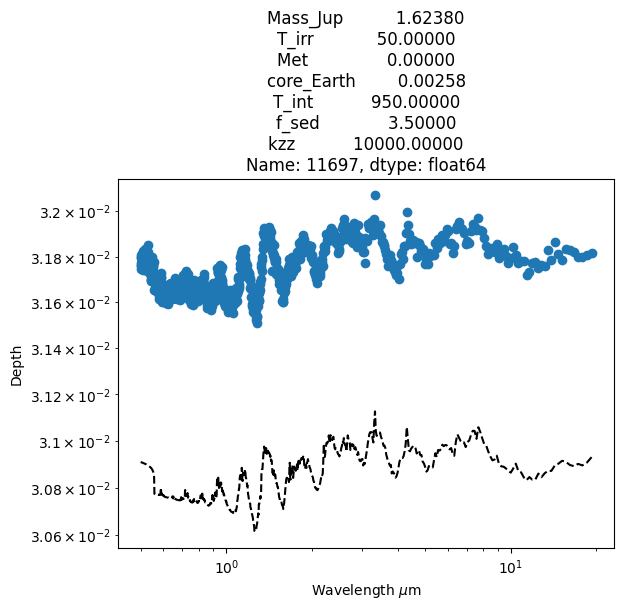

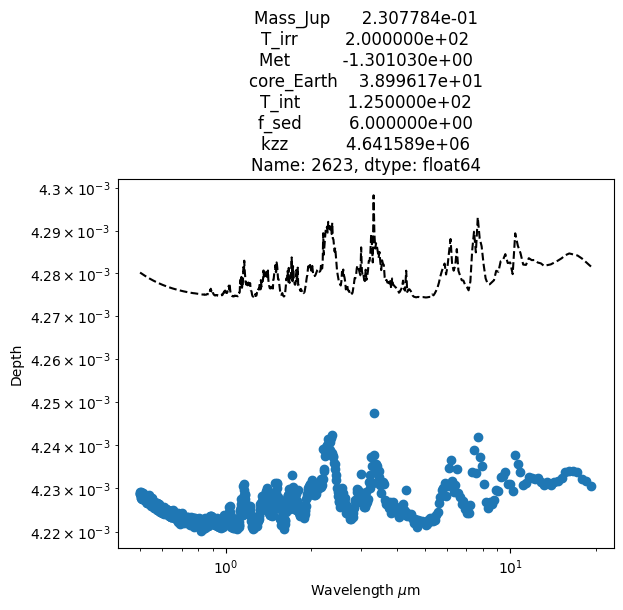

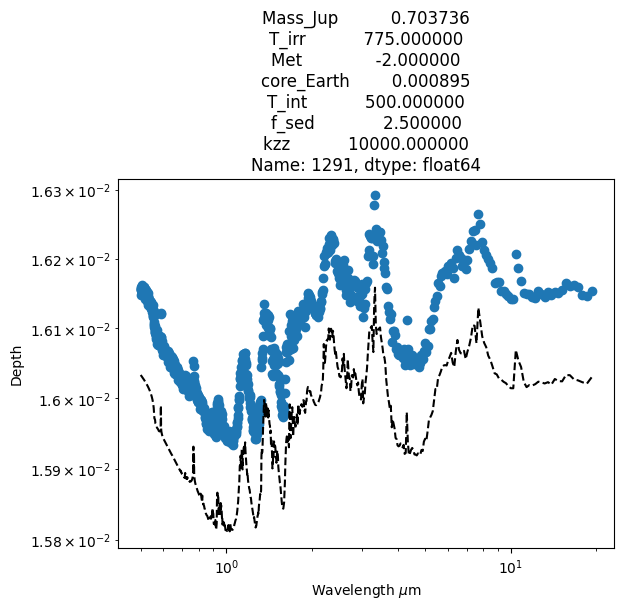

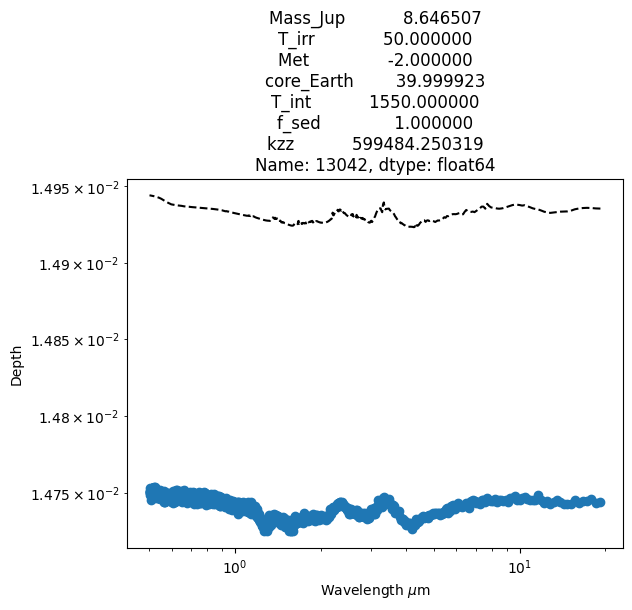

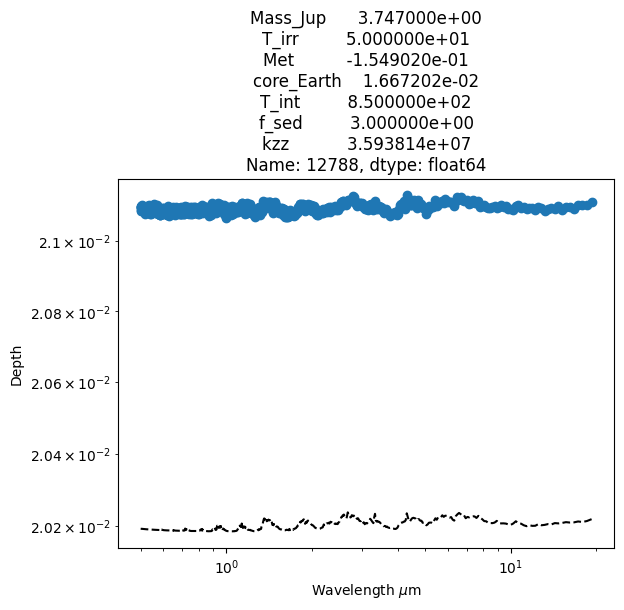

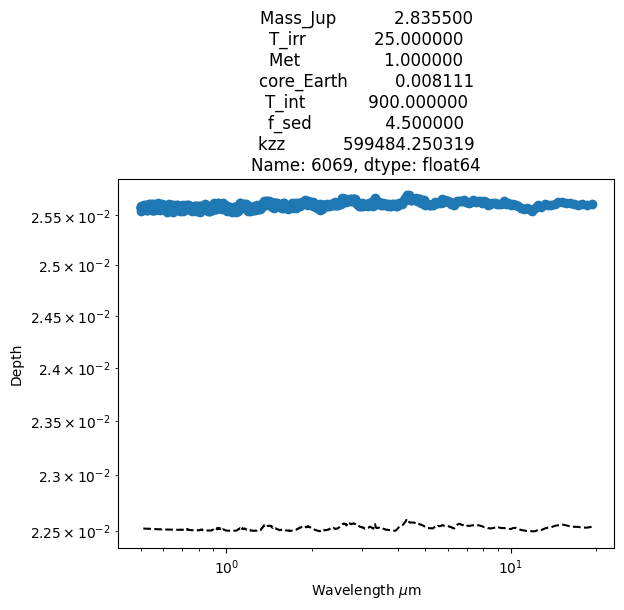

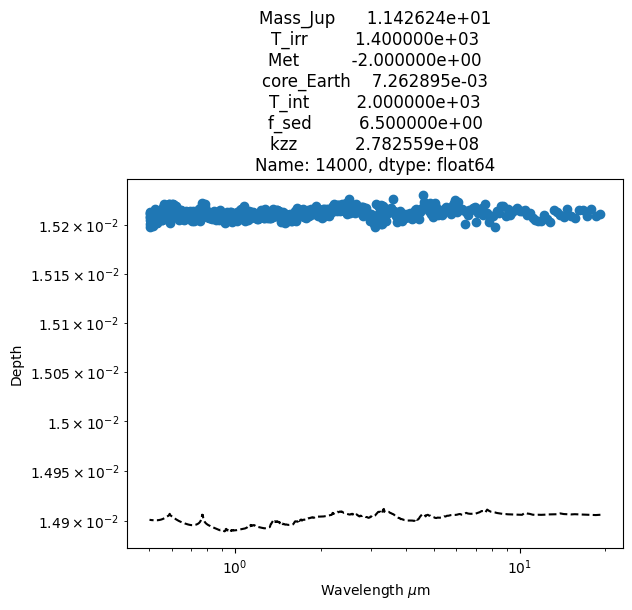

In [7]:
prediction = ML.use_model(model_depth,ML.X_test)
truth = ML.y_test['depth_radius']
for ii in range(10) :
    plt.figure()
    plt.plot(ML.wavelength, prediction[ii,:len(ML.wavelength)]*(prediction[ii,-1]**2/(R_s)**2), 'o')
    plt.plot(ML.wavelength, 10**truth.iloc[ii][:len(ML.wavelength)]*((10**truth.iloc[ii][-1])**2/(R_s)**2), '--', color ='k')
    plt.title(ML.X_test.iloc[ii])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'Wavelength $\mu$m')
    plt.ylabel(r'Depth')
    plt.savefig('../figures/depth_prediction.pdf')
    plt.show()

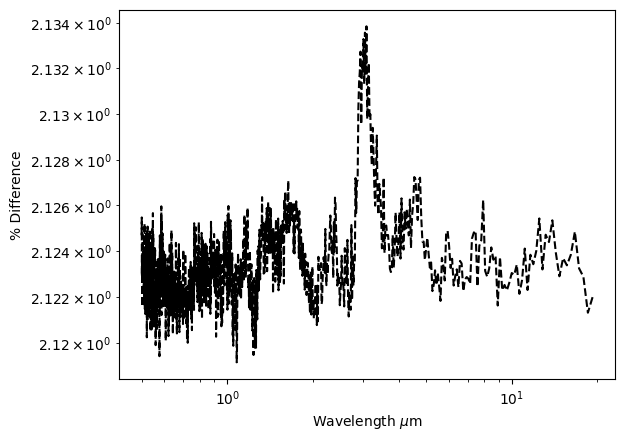

In [10]:
# Get model predictions
predictions = ML.use_model(model_depth, ML.X_test)
# Extract flux values
pred_flux = predictions[:, :len(ML.wavelength)] * (predictions[:, -1][:, np.newaxis]**2 / R_s**2)
# Compute true flux
depth_radius = 10**np.array((ML.y_test['depth_radius'].iloc[:]).to_list())  # Convert to array
true_flux = depth_radius[:, :len(ML.wavelength)] * ((depth_radius[:, -1][:, np.newaxis])**2 / R_s**2)
plt.plot(ML.wavelength, np.abs(100*(pred_flux-true_flux)/true_flux).mean(axis=0), '--', color ='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Wavelength $\mu$m')
plt.ylabel(r'% Difference')
plt.savefig('../figures/flux_prediction_error.pdf')
plt.show()

1.0455862363754371


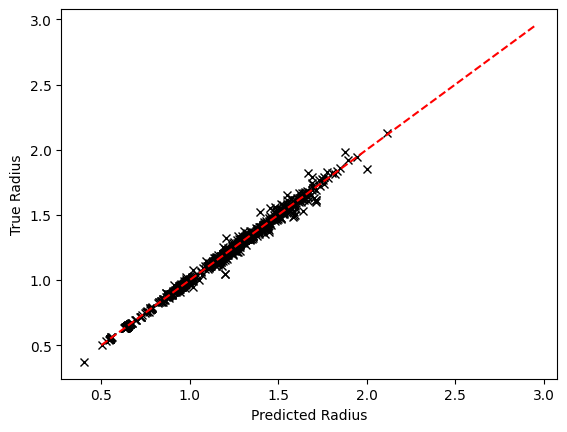

In [11]:
plt.plot(ML.use_model(model_depth,ML.X_test)[:,-1],10**np.array(ML.y_test['depth_radius'].to_list())[:,-1], 'x', color ='k')
plt.plot(np.arange(0.5,3,0.05),np.arange(0.5,3,0.05), '--', color ='r')
print(100*np.mean(np.abs(ML.use_model(model_depth,ML.X_test)[:,-1]-10**np.array(ML.y_test['depth_radius'].to_list())[:,-1])/10**np.array(ML.y_test['depth_radius'].to_list())[:,-1]))
plt.xlabel('Predicted Radius')
plt.ylabel('True Radius')
plt.savefig('../figures/cm_radius_prediction.pdf')
plt.show()

In [15]:
WL_photo = np.array(get_wl_all_filters(read_filter_docs(filter_loc='./../../data/filters/filter_doc.csv')))
idx_photo = np.where(WL_photo == 11.3)[0]
lambda x: ML.use_model(model_flux,x)
out = ML.use_model(model_flux,ML.X_train)
MIRI = out[:,len(ML.wavelength)+idx_photo]
radius = out[:,-2]
age = out[:,-1]
MIRI = diluted_planet(MIRI.flatten(), radius, 34.1)


ValueError: X has 7 features, but RandomForestRegressor is expecting 8 features as input.

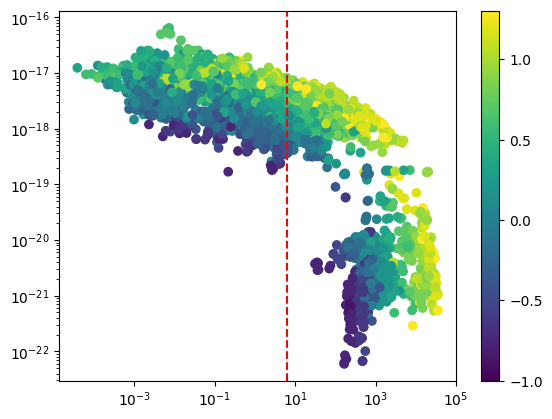

In [10]:
plt.scatter(age/1e6, MIRI, c=np.log10(ML.X_train['Mass_Jup']))
plt.yscale('log')
plt.xscale('log')
plt.axvline(x=6.4, color='r', linestyle='--')
plt.colorbar()

In [11]:
from scipy.interpolate import LinearNDInterpolator

10**LinearNDInterpolator(list(zip(age/1e6, MIRI)), np.log10(ML.X_train['Mass_Jup']),rescale=True)(6.4,5.6e-19)
f_flux = lambda x: 10**LinearNDInterpolator(list(zip(age/1e6, MIRI)), np.log10(ML.X_train['Mass_Jup']),rescale=True)(6.4,x)


23.836235766912253

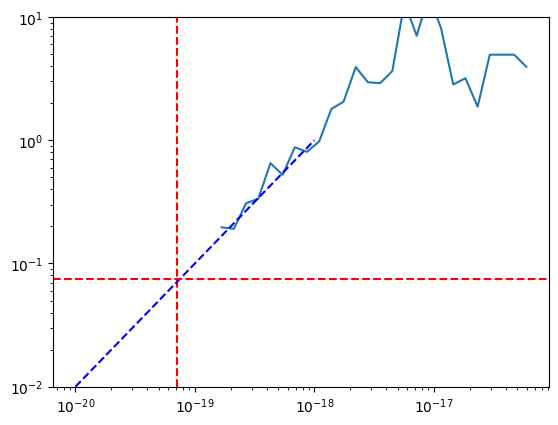

In [12]:
plt.plot(np.logspace(-15,-20),f_flux(np.logspace(-15,-20)))
plt.xscale('log')
plt.yscale('log')   
plt.axvline(x=7.043444075495339e-20, color='r', linestyle='--')
plt.ylim(1e-2,1e1)
plt.plot(np.linspace(1e-20,1e-18),np.linspace(1e-2,1), '--', color ='b')
plt.axhline(y=7.5e-2, color='r', linestyle='--')
7.5e-2*M_J/M_E